# EDA and Visualization

Lets start by importing the necessary libraries.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

! pip install plotly
import plotly.express as px

sns.set()

In [3]:
bin_df = pd.read_csv('data/dataframes/df_after_cols_reduction.csv').iloc[:,1:]
pca_2d_df = pd.read_csv('data/dataframes/pca_2d_df.csv').iloc[:,1:]
pca_3d_df = pd.read_csv('data/dataframes/pca_3d_df.csv').iloc[:,1:]

cat_cols = ['company_name', 'company_about','founded', 'business model','employees','product stage','status','funding stage','succeeded']
num_cols = ['total_raised','total_rounds', 'investors','ipo_price', 'geo_market_per']
tag_cols = [col for col in bin_df.columns if col.startswith('tag_')]
targetmarket_cols = [col for col in bin_df.columns if col.startswith('targetmarket_')]
sector_list = [col for col in bin_df.columns if col.startswith("sector_")]
target_ind_list = [col  for col in bin_df.columns if col.startswith("industry_")]
technology_list = [col  for col in bin_df.columns if col.startswith("technology_")]


pca_2d_cols = [col for col in pca_2d_df.columns if col not in cat_cols and col not in num_cols]
pca_3d_cols = [col for col in pca_3d_df.columns if col not in cat_cols and col not in num_cols]
bin_cols = tag_cols + targetmarket_cols + sector_list + target_ind_list + technology_list

In [4]:
print(f'Shape of binary dataframe: {bin_df.shape}')
print(f'Shape of 2D pca dataframe: {pca_2d_df.shape}')
print(f'Shape of 3D pca dataframe: {pca_3d_df.shape}')

Shape of binary dataframe: (10070, 1927)
Shape of 2D pca dataframe: (10070, 26)
Shape of 3D pca dataframe: (10070, 32)


In [5]:
print(f'Length of tag_cols: {len(tag_cols)}')
print(f'Length of targetmarket_cols: {len(targetmarket_cols)}')
print(f'Length of sector_list: {len(sector_list)}')
print(f'Length of target_ind_list: {len(target_ind_list)}')
print(f'Length of technology_list: {len(technology_list)}')
print(f'Length of 2D pca_cols: {len(pca_2d_cols)}')
print(f'Length of 3D pca_cols: {len(pca_3d_cols)}')

Length of tag_cols: 1599
Length of targetmarket_cols: 117
Length of sector_list: 41
Length of target_ind_list: 81
Length of technology_list: 75
Length of 2D pca_cols: 12
Length of 3D pca_cols: 18


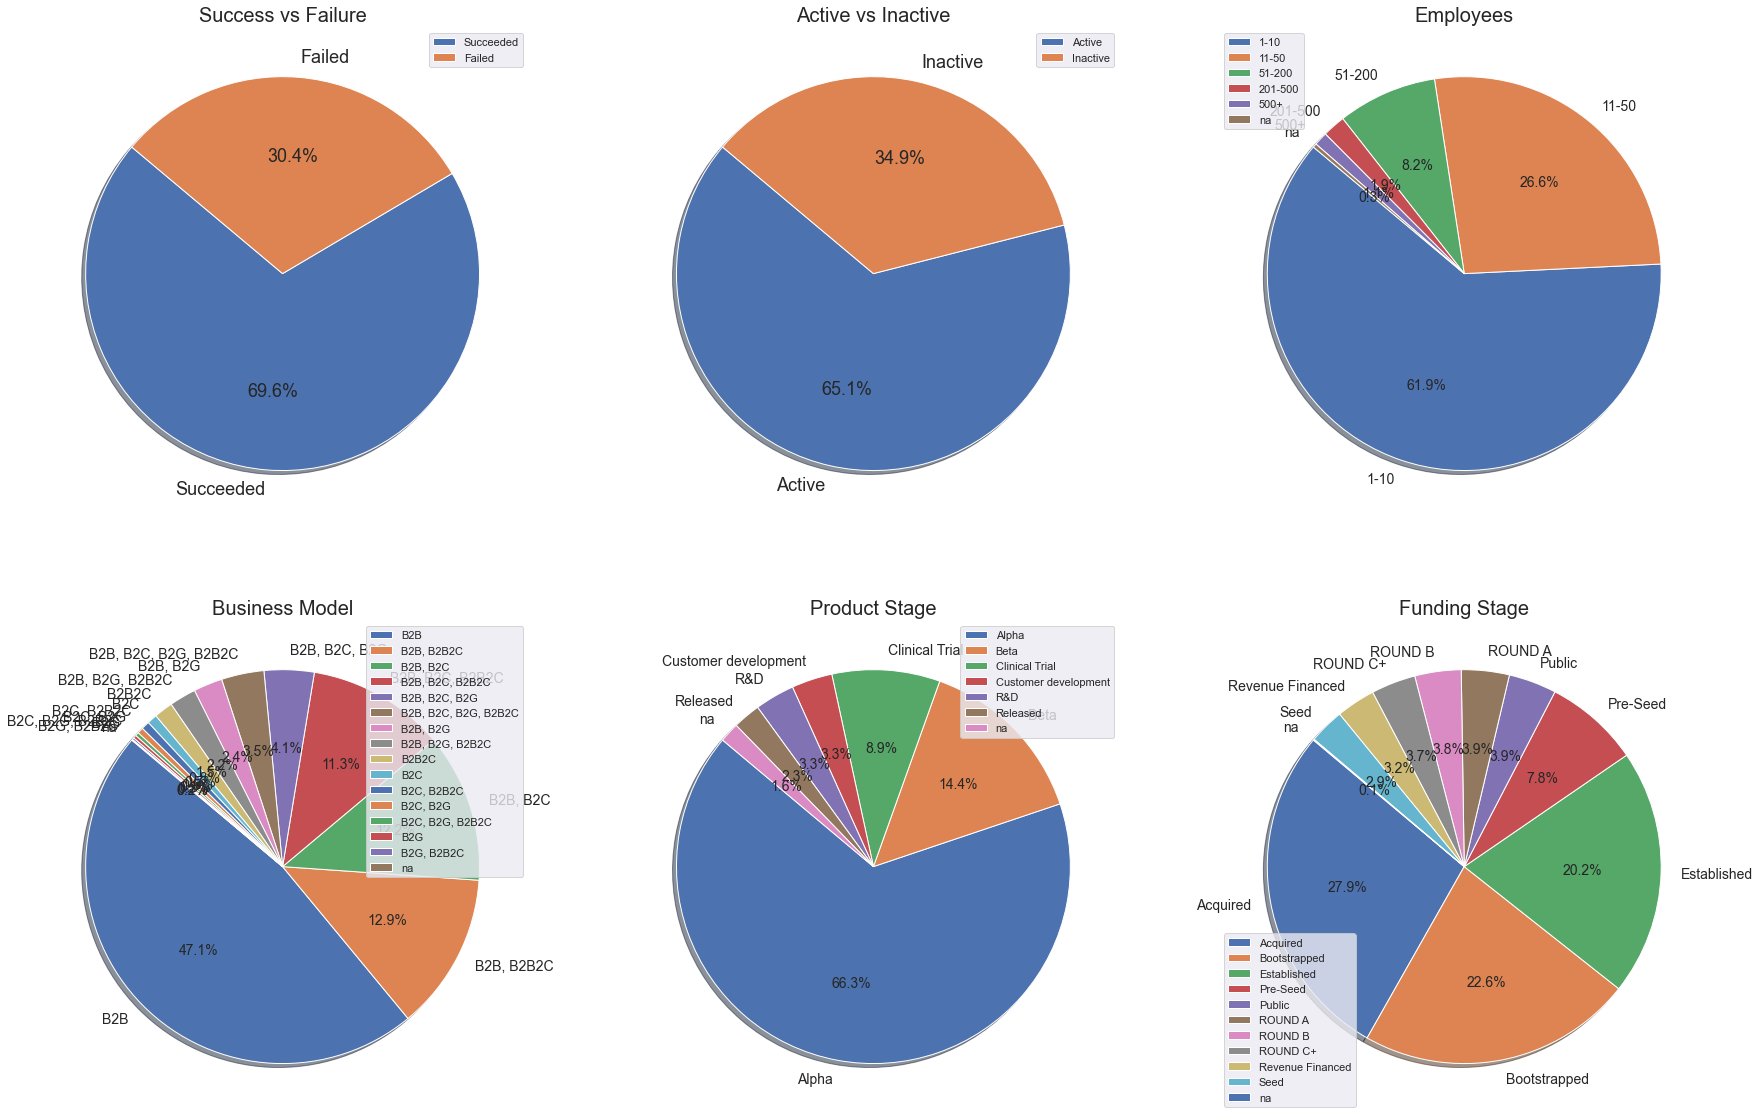

In [86]:
success_label = ['Succeeded', 'Failed']
business_model_labels = ['B2B', 'B2B, B2B2C', 'B2B, B2C', 'B2B, B2C, B2B2C', 'B2B, B2C, B2G',
 'B2B, B2C, B2G, B2B2C', 'B2B, B2G', 'B2B, B2G, B2B2C', 'B2B2C', 'B2C',
 'B2C, B2B2C', 'B2C, B2G', 'B2C, B2G, B2B2C', 'B2G', 'B2G, B2B2C', 'na']
product_stage_labels = ['Alpha', 'Beta', 'Clinical Trial', 'Customer development', 'R&D', 'Released', 'na']
funding_stage_labels = ['Acquired', 'Bootstrapped', 'Established', 'Pre-Seed', 'Public', 'ROUND A', 'ROUND B', 'ROUND C+', 'Revenue Financed', 'Seed', 'na']
employees_lable = ['1-10', '11-50', '51-200', '201-500', '500+', 'na']

def plot_pie(axe,data,labels,title, fontsize = 14):
    axe.pie(data, labels=labels, autopct='%1.1f%%', shadow=True, startangle=140, textprops={'fontsize': fontsize})
    axe.set_title(title, fontsize=20)
    axe.legend(labels, loc='best')
    return axe


fig, axes = plt.subplots(2,3, figsize=(30,20))
# fig.set_facecolor("whitesmoke")
axes[0,0] = plot_pie(axes[0,0], bin_df['succeeded'].value_counts().values, success_label, 'Success vs Failure', 18)
axes[0,1] = plot_pie(axes[0,1], bin_df['status'].value_counts().values, ['Active','Inactive'], 'Active vs Inactive', 18)
axes[0,2] = plot_pie(axes[0,2], bin_df['employees'].value_counts().values, employees_lable, 'Employees')
axes[1,0] = plot_pie(axes[1,0], bin_df['business model'].value_counts().values, business_model_labels, 'Business Model')
axes[1,1] = plot_pie(axes[1,1], bin_df['product stage'].value_counts().values, product_stage_labels, 'Product Stage')
axes[1,2] = plot_pie(axes[1,2], bin_df['funding stage'].value_counts().values, funding_stage_labels, 'Funding Stage')


